In [1]:
import pandas as pd
from sqlalchemy import create_engine
import numpy as np
import sqlalchemy as sqlalchemy
import nltk
import matplotlib.pyplot as plt
import scipy.stats as sts

In [2]:
rds_connection_string = "postgres:postgres@localhost:5432/finalp_db"
engine = create_engine(f'postgresql://{rds_connection_string}')

In [3]:
engine.table_names()

['review_info', 'movie_info']

In [8]:
movie_info=pd.read_sql_query('select * from movie_info', con=engine)

In [9]:
duplicates=movie_info[movie_info.duplicated()]
duplicates

,movie_id,movie_title,rating,nreviews,genre,genre1,genre2,genre3
935,tt9140560,WandaVision,8.3,71301.0,Action Comedy Drama,Action,Comedy,Drama
937,tt11192306,Superman and Lois,8.1,4610.0,Action Adventure Drama,Action,Adventure,Drama
940,tt9184982,Tribes of Europa,6.8,5457.0,Action Adventure Drama,Action,Adventure,Drama
941,tt2560140,Attack on Titan,8.9,205356.0,Animation Action Adventure,Animation,Action,Adventure
946,tt0944947,Game of Thrones,9.3,1777796.0,Action Adventure Drama,Action,Adventure,Drama
...,...,...,...,...,...,...,...,...
3189,tt0775440,Cell,4.4,25652.0,Action Adventure Horror,Action,Adventure,Horror
3190,tt0167190,Hellboy,6.8,307092.0,Action Fantasy Horror,Action,Fantasy,Horror
3195,tt6110648,The Purge,6.5,12879.0,Action Drama Horror,Action,Drama,Horror
3200,tt0118956,Deep Rising,6.1,33589.0,Action Adventure Horror,Action,Adventure,Horror


In [10]:
movie_info_clean=movie_info.drop_duplicates(subset="movie_id")
movie_info_clean

,movie_id,movie_title,rating,nreviews,genre,genre1,genre2,genre3
0,tt9140560,WandaVision,8.3,71301.0,Action Comedy Drama,Action,Comedy,Drama
1,tt11192306,Superman and Lois,8.1,4610.0,Action Adventure Drama,Action,Adventure,Drama
2,tt9184982,Tribes of Europa,6.8,5457.0,Action Adventure Drama,Action,Adventure,Drama
3,tt2560140,Attack on Titan,8.9,205356.0,Animation Action Adventure,Animation,Action,Adventure
4,tt0944947,Game of Thrones,9.3,1777796.0,Action Adventure Drama,Action,Adventure,Drama
...,...,...,...,...,...,...,...,...
3837,tt2040560,The Pact,5.8,23479.0,Horror Mystery Thriller,Horror,Mystery,Thriller
3838,tt0105459,Split Second,6.2,12598.0,Action Crime Horror,Action,Crime,Horror
3839,tt4798836,Bad Hair,5.6,2242.0,Comedy Horror,Comedy,Horror,NaN
3840,tt0044121,The Thing from Another World,7.1,26026.0,Horror Sci-Fi,Horror,Sci-Fi,NaN


3334

In [18]:
review_info=pd.read_sql_query('select * from review_info', con=engine)

In [20]:
review_info_clean=review_info.drop_duplicates()
review_info_clean

,movie_id,rating_ind,rating_text
0,tt6878306,9.0,I'm a big fan of Paul Greengrass and Tom Hanks...
1,tt6878306,8.0,Having read the book made the movie easier to ...
2,tt6878306,8.0,Tom Hanks is a 19th century newsman who reads ...
3,tt6878306,9.0,I didn't really love this film. I think it is ...
4,tt6878306,7.0,It wasn't unreasonable for me to be properly e...
...,...,...,...
17908,tt0086154,8.0,Psycho II does a great job continuing with the...
17909,tt0086154,8.0,Everyone knows the original 'Psycho' film and ...
17910,tt9742392,3.0,"This movie just becomes one more recent film ,..."
17911,tt9742392,2.0,The success of a slow-moving thriller depends ...


CREATING A BINARY VARIABLE FOR SENTIMENT ANALYSIS 

In [21]:
pos_neg_ind=np.where(review_info_clean["rating_ind"]<6,0,1)
review_info_clean["pos_neg_ind"]=pos_neg_ind.tolist()

C:\Users\arpib\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [22]:
review_info_clean

,movie_id,rating_ind,rating_text,pos_neg_ind
0,tt6878306,9.0,I'm a big fan of Paul Greengrass and Tom Hanks...,1
1,tt6878306,8.0,Having read the book made the movie easier to ...,1
2,tt6878306,8.0,Tom Hanks is a 19th century newsman who reads ...,1
3,tt6878306,9.0,I didn't really love this film. I think it is ...,1
4,tt6878306,7.0,It wasn't unreasonable for me to be properly e...,1
...,...,...,...,...
17908,tt0086154,8.0,Psycho II does a great job continuing with the...,1
17909,tt0086154,8.0,Everyone knows the original 'Psycho' film and ...,1
17910,tt9742392,3.0,"This movie just becomes one more recent film ,...",0
17911,tt9742392,2.0,The success of a slow-moving thriller depends ...,0


EXPLORING DATA AND FURTHER CLEANUP

In [23]:
combined_df=review_info_clean.merge(movie_info_clean, how="left",on="movie_id")

In [24]:
combined_df.describe()
movie_df=combined_df.drop_duplicates()
movie_df

,movie_id,rating_ind,rating_text,pos_neg_ind,movie_title,rating,nreviews,genre,genre1,genre2,genre3
0,tt6878306,9.0,I'm a big fan of Paul Greengrass and Tom Hanks...,1,News of the World,6.8,39587.0,Action Adventure Drama,Action,Adventure,Drama
1,tt6878306,8.0,Having read the book made the movie easier to ...,1,News of the World,6.8,39587.0,Action Adventure Drama,Action,Adventure,Drama
2,tt6878306,8.0,Tom Hanks is a 19th century newsman who reads ...,1,News of the World,6.8,39587.0,Action Adventure Drama,Action,Adventure,Drama
3,tt6878306,9.0,I didn't really love this film. I think it is ...,1,News of the World,6.8,39587.0,Action Adventure Drama,Action,Adventure,Drama
4,tt6878306,7.0,It wasn't unreasonable for me to be properly e...,1,News of the World,6.8,39587.0,Action Adventure Drama,Action,Adventure,Drama
...,...,...,...,...,...,...,...,...,...,...,...
15074,tt0086154,8.0,Psycho II does a great job continuing with the...,1,Psycho II,6.5,24322.0,Crime Horror Mystery,Crime,Horror,Mystery
15075,tt0086154,8.0,Everyone knows the original 'Psycho' film and ...,1,Psycho II,6.5,24322.0,Crime Horror Mystery,Crime,Horror,Mystery
15076,tt9742392,3.0,"This movie just becomes one more recent film ,...",0,Kindred,4.8,561.0,Drama Horror Mystery,Drama,Horror,Mystery
15077,tt9742392,2.0,The success of a slow-moving thriller depends ...,0,Kindred,4.8,561.0,Drama Horror Mystery,Drama,Horror,Mystery


In [30]:
#any movie in the dataset that has a tag of being horror**Drama and so on

horror_df=movie_df[movie_df['genre'].str.contains("Horror")]
horror_df.head()

drama_df=movie_df[movie_df['genre'].str.contains("Drama")]
drama_df

comedy_df=movie_df[movie_df['genre'].str.contains("Comedy")]
comedy_df

action_df=movie_df[movie_df['genre'].str.contains("Action")]
action_df


,movie_id,rating_ind,rating_text,pos_neg_ind,movie_title,rating,nreviews,genre,genre1,genre2,genre3
0,tt6878306,9.0,I'm a big fan of Paul Greengrass and Tom Hanks...,1,News of the World,6.8,39587.0,Action Adventure Drama,Action,Adventure,Drama
1,tt6878306,8.0,Having read the book made the movie easier to ...,1,News of the World,6.8,39587.0,Action Adventure Drama,Action,Adventure,Drama
2,tt6878306,8.0,Tom Hanks is a 19th century newsman who reads ...,1,News of the World,6.8,39587.0,Action Adventure Drama,Action,Adventure,Drama
3,tt6878306,9.0,I didn't really love this film. I think it is ...,1,News of the World,6.8,39587.0,Action Adventure Drama,Action,Adventure,Drama
4,tt6878306,7.0,It wasn't unreasonable for me to be properly e...,1,News of the World,6.8,39587.0,Action Adventure Drama,Action,Adventure,Drama
...,...,...,...,...,...,...,...,...,...,...,...
15048,tt3838992,2.0,"Would have worked better as a ""Grindhouse"" typ...",0,Yoga Hosers,4.3,12395.0,Action Comedy Fantasy,Action,Comedy,Fantasy
15049,tt3838992,6.0,Love Kevin but if he makes stuff like Yoga Hos...,1,Yoga Hosers,4.3,12395.0,Action Comedy Fantasy,Action,Comedy,Fantasy
15050,tt3838992,9.0,I watched #YogaHosers at Comic-Con and I ended...,1,Yoga Hosers,4.3,12395.0,Action Comedy Fantasy,Action,Comedy,Fantasy
15051,tt3838992,1.0,I'm giving it 2 stars.One because of Johnny De...,0,Yoga Hosers,4.3,12395.0,Action Comedy Fantasy,Action,Comedy,Fantasy


In [42]:
action_movie_n=len(action_df['movie_id'])
avg_action_rating=action_df['rating'].mean()
action_pos_ind=sum(action_df['pos_neg_ind'])
print(action_movie_n,avg_action_rating,action_pos_ind)

5598 6.621596998928188 4170


In [44]:
comedy_movie_n=len(comedy_df['movie_id'])
avg_comedy_rating=comedy_df['rating'].mean()
comedy_pos_ind=sum(comedy_df['pos_neg_ind'])
print(comedy_movie_n,avg_comedy_rating,comedy_pos_ind)

4633 6.740319447442262 3806


In [46]:
drama_movie_n=len(drama_df['movie_id'])
avg_drama_rating=drama_df['rating'].mean()
drama_pos_ind=sum(drama_df['pos_neg_ind'])
print(drama_movie_n,avg_drama_rating,drama_pos_ind)

6175 7.003336032388663 4748


In [39]:
horror_movie_n=len(horror_df['movie_id'])
avg_horror_rating=horror_df['rating'].mean()
horror_pos_ind=sum(horror_df['pos_neg_ind'])
print(Horror_movie_n,avg_horror_rating,horror_pos_ind)


4934 6.085123631941629 3599


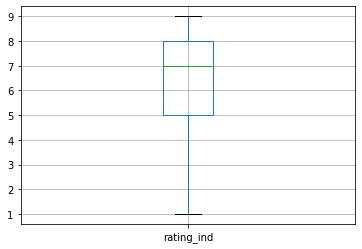

In [47]:
action_boxplot = action_df.boxplot(column=['rating_ind'])
plt.show()

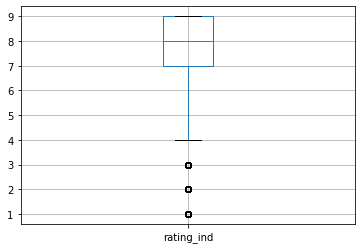

In [58]:
comedy_boxplot = comedy_df.boxplot(column=['rating_ind'])
plt.show()


In [98]:
comedy_outliers=comedy_df[comedy_df['rating_ind']<2]
comedy_outliers

,movie_id,rating_ind,rating_text,pos_neg_ind,movie_title,rating,nreviews,genre,genre1,genre2,genre3
178,tt7713068,1.0,"Before we saw this movie, my son told me that ...",0,Birds of Prey,6.1,170869.0,Action Adventure Comedy,Action,Adventure,Comedy
179,tt7713068,1.0,Birds of Prey: and the Fantabulous Emancipatio...,0,Birds of Prey,6.1,170869.0,Action Adventure Comedy,Action,Adventure,Comedy
290,tt8080292,1.0,There is a moment in one of Terry Pratchett's ...,0,The Watch,5.1,3164.0,Action Adventure Comedy,Action,Adventure,Comedy
291,tt8080292,1.0,How dare BBC America create this abomination a...,0,The Watch,5.1,3164.0,Action Adventure Comedy,Action,Adventure,Comedy
292,tt8080292,1.0,One of the things I keep hearing about this sh...,0,The Watch,5.1,3164.0,Action Adventure Comedy,Action,Adventure,Comedy
...,...,...,...,...,...,...,...,...,...,...,...
14802,tt1612774,1.0,This struck me as a film people were pained to...,0,Rubber,5.8,34403.0,Comedy Fantasy Horror,Comedy,Fantasy,Horror
14806,tt1612774,1.0,How does one succinctly describe Rubber to ano...,0,Rubber,5.8,34403.0,Comedy Fantasy Horror,Comedy,Fantasy,Horror
15043,tt3838992,1.0,I have seen reviews here bashing the movie. Yo...,0,Yoga Hosers,4.3,12395.0,Action Comedy Fantasy,Action,Comedy,Fantasy
15046,tt3838992,1.0,Kevin Smith definitely didn't shoot for the mo...,0,Yoga Hosers,4.3,12395.0,Action Comedy Fantasy,Action,Comedy,Fantasy


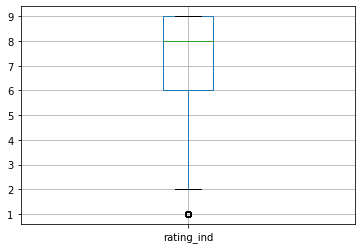

In [49]:
drama_boxplot = drama_df.boxplot(column=['rating_ind'])
plt.show()

In [65]:
drama_df['rating_ind'].value_counts()

9.0    1799
8.0    1638
7.0     897
6.0     414
1.0     367
5.0     318
4.0     263
3.0     248
2.0     231
Name: rating_ind, dtype: int64

In [94]:
drama_outliers=drama_df[drama_df['rating_ind']<2]


drama_horror_out=drama_outliers[drama_outliers['genre'].str.contains('Horror')]
drama_action_out=drama_outliers[drama_outliers['genre'].str.contains('Action')]
drama_comedy_out=drama_outliers[drama_outliers['genre'].str.contains('Comedy')]
print(f'Drama mixed with Action')
print(len(drama_action_out['movie_id']))
print(f'Drama mixed with Horror')
print(len(drama_horror_out['movie_id']))
print(f'Drama mixed with Comedy')
print(len(drama_comedy_out))
drama_outliers

Drama mixed with Action
132
Drama mixed with Horror
57
Drama mixed with Comedy
78


,movie_id,rating_ind,rating_text,pos_neg_ind,movie_title,rating,nreviews,genre,genre1,genre2,genre3
51,tt11242246,1.0,Cheesy. Just cheesy. This is a total DISGRACE ...,0,The Equalizer,4.4,4356.0,Action Crime Drama,Action,Crime,Drama
69,tt8179402,1.0,"It's a fantastic show, and I genuinely believe...",0,Fate: The Winx Saga,6.9,22440.0,Action Adventure Drama,Action,Adventure,Drama
124,tt5171438,1.0,The usual talentless hacks are back with their...,0,Star Trek: Discovery,7.2,96955.0,Action Adventure Drama,Action,Adventure,Drama
135,tt5171438,1.0,This is absolutely NOT Star Trek. Star Trek ha...,0,Star Trek: Discovery,7.2,96955.0,Action Adventure Drama,Action,Adventure,Drama
209,tt1600194,1.0,When has a sequel approached or surpassed the ...,0,Hawaii Five-0,7.3,67008.0,Action Crime Drama,Action,Crime,Drama
...,...,...,...,...,...,...,...,...,...,...,...
14959,tt1663655,1.0,"Being a huge fan of the French 2008 movie ""Mar...",0,Martyrs,4.0,5417.0,Drama Horror Thriller,Drama,Horror,Thriller
14980,tt0498381,1.0,Like someone already wrote on here Rings 2017 ...,0,Rings,4.5,37928.0,Drama Horror Mystery,Drama,Horror,Mystery
14982,tt0498381,1.0,"Sometimes regardless of view, a film is just a...",0,Rings,4.5,37928.0,Drama Horror Mystery,Drama,Horror,Mystery
14984,tt0498381,1.0,"""Rings"" is a horror movie in which we watch a ...",0,Rings,4.5,37928.0,Drama Horror Mystery,Drama,Horror,Mystery


In [87]:
drama_horror=drama_df[drama_df['genre'].str.contains("Horror")]
drama_horror
drama_horror['rating_ind'].value_counts()

8.0    350
9.0    279
7.0    251
6.0    149
5.0     99
4.0     80
3.0     76
2.0     63
1.0     57
Name: rating_ind, dtype: int64

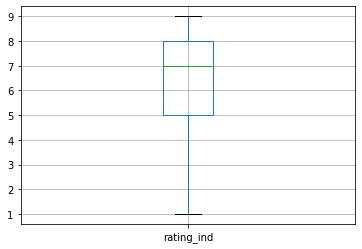

In [50]:
horror_boxplot = horror_df.boxplot(column=['rating_ind'])
plt.show()

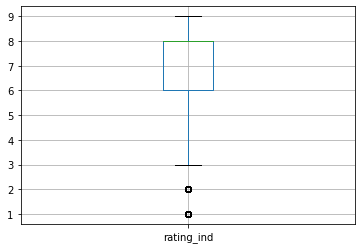

In [51]:
boxplot =movie_df.boxplot(column=['rating_ind'])
plt.show()

In [ ]:
# look at the ouliers clean them if needed


<AxesSubplot:>

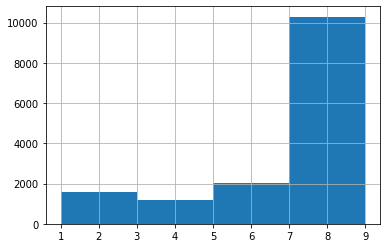

In [62]:
movie_df['rating_ind'].hist(bins=4)

In [64]:

movie_df['rating_ind'].value_counts()

8.0    4013
9.0    3682
7.0    2598
6.0    1240
1.0    1011
5.0     801
3.0     599
4.0     582
2.0     553
Name: rating_ind, dtype: int64

<AxesSubplot:>

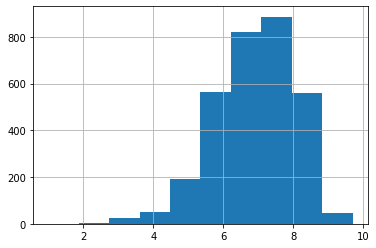

In [63]:
movie_info_clean['rating'].hist(bins=10)

In [1]:
#----WORDCLOUD CODE----
#calling dependencies
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
%matplotlib inline
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.express as px
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize 
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 
import pandas as pd 
stopwords = set(STOPWORDS)

!pip install -U textblob


In [103]:
#example of how texblob works
from textblob import TextBlob

In [54]:
 text =["I hate not seeing you. I also hate not being able to talk to you. please, don't get sick ever again.","I remember the sunny days. The best memories that I have created. "]

In [55]:
for i in text:
    blob=TextBlob(i)
    print(i)
    print(blob.sentiment.polarity)
    

I hate not seeing you. I also hate not being able to talk to you. please, don't get sick ever again.
-0.4535714285714286
I remember the sunny days. The best memories that I have created. 
1.0


In [104]:
txt=movie_df["rating_text"]
polar=[]
for i in txt:
    blob=TextBlob(i)
    polar.append(blob.sentiment.polarity)
    #print(blob.sentiment.polarity)
    

In [6]:
movie_df=movie_df.assign(polarity=polar)

NameError: name 'movie_df' is not defined

In [7]:
movie_df

NameError: name 'movie_df' is not defined

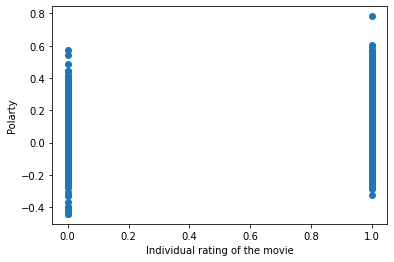

In [108]:
#plt.scatter(review_info['polarity'],review_info['rating_ind'],c=)
#the data points using the median income of the block.
plt.scatter(movie_df['pos_neg_ind'],movie_df['polarity'])
#clb = plt.colorbar()
plt.xlabel("Individual rating of the movie")
plt.ylabel("Polarty")
#clb.set_label("")
plt.show()

In [2]:
###---Wordcloud Code---###
#calling dependencies
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
%matplotlib inline
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.express as px
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize 
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt 
import pandas as pd 
stopwords = set(STOPWORDS)
import numpy as np
from PIL import Image
from os import path

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\dross\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
negative_df=movie_df[movie_df['pos_neg_ind']==0]
negative_df

In [ ]:
positive_df=movie_df[movie_df['pos_neg_ind']==1]
positive_df

In [ ]:
#Wordcloud for combined dataset
comment_words = ''

# iterate through dataframe
for val in movie_df.rating_text: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Convert each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "
  


wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                max_words=1000,
                min_font_size = 10).generate(comment_words) 

# plot the WordCloud image                         
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.title("IMDB User Reviews Wordcloud")
  
plt.show() 

In [ ]:
#eliminating common words from collected tokens to observe more granular results between wordclouds
stopwords = list(stopwords)+["show", "movie", "character", "time", "film", "one", "make", "serie", 
                             "see", "story", "characters", "watch", "series", "good", "even", "much", "well",
                            "really", "first", "great", "way"]

In [ ]:
#Wordcloud for positive reviews
comment_words = ''

# iterate through dataframe
for val in movie_df.rating_text: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Convert each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "
  


wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                max_words=1000,
                min_font_size = 10).generate(comment_words) 

# plot the WordCloud image                         
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.title("Positive Reviews Wordcloud")
  
plt.show() 

In [ ]:
#Wordcloud for negative reviews
#negative reviews across dataset
for val in negative_df.rating_text: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                max_words=1000,
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.title("Negative Review Wordcloud")

plt.show() 